In [68]:
import matplotlib.pyplot as plt
import numpy as np
import hashlib
import time
import hmac

In [69]:
salt = "0xd2867566759e9158bda9bf93b343bbd9aa02ce1e0c5bc2b37a2d70d391b04f14"
e = 2**52

In [70]:
hash_partida = 'bfb99dd5642e6e21733cccb66272e603117760e0d9cffa1eb3a5c19a0520e46f'  #refenreica de 3.08


#fonte de dados sobre como a honestidade dos resultados rola 
#https://roobet.com/fair


In [71]:
def resultado(hash_partida):
    hm = hmac.new(str.encode(hash_partida), b'', hashlib.sha256)
    hm.update(salt.encode("utf-8"))
    h = hm.hexdigest()
    if (int(h, 16) % 33 == 0):
        return 1
    h = int(h[:13], 16)
    e = 2**52
    return (((100 * e - h) / (e-h)) // 1) / 100.0

def partida_anterior(hash_code):
    m = hashlib.sha256()
    m.update(hash_code.encode("utf-8"))
    return m.hexdigest()

In [72]:
resultado(hash_partida)


3.08

In [73]:
ult_partida = '5ec9caae6ebf166e0ea5220846eb1b1b83421e4b1a20dc561b17e84f111259fa' # Update to latest game's hash for more results
prim_partida = "77b271fe12fca03c618f63dfb79d4105726ba9d4a25bb3f1964e435ccf9cb209"

resultados = []
contador = 0
while ult_partida != prim_partida:
    contador += 1
    resultados.append(resultado(ult_partida))
    ult_partida = partida_anterior(ult_partida)
    if contador == 500000:
        break
    
resultados = np.array(resultados)

In [74]:
multiplicador = 20
#probabilidea de erro
(resultados <= multiplicador).mean()



# entendesse que eu tenho 52% de chance de perder $ ganho aposto com 2 de multiplicador, usando caso real 

0.951592

### Martin Gale 


In [75]:
#hipote de balnaço de 1000 reias 
valor_aposta = 0.01
conta = 1000
alvo = 2

def Martingale(resultados,alvo,valor_aposta,conta):
    
    balanco = [conta]
    valores_apostados = [0]
    erro = 0
    for i in resultados:
        valores_apostados.append(valor_aposta*2**erro)

        if alvo >= i:
            
            balanco.append(conta + valor_aposta*2**erro)
            erro = 0
        else:
            balanco.append(conta - valor_aposta*2**erro)
            erro += 1 
        conta = balanco[-1]
        
    balanco = [i - balanco[0] for i in balanco]   
    
    return balanco, valores_apostados

def plot_strategy(y_balanco,y_aposta,estrategia,alvo,valor_aposta):
    x = list(range(len(y_balanco)))
    plt.plot(x, y_balanco, label='Lucro Acumulado')
    plt.bar(x, y_aposta, label='Valor da aposta', color='orange', alpha=0.7)
    plt.xlabel('Numero de apostas')
    plt.ylabel('$')
    plt.title(f'Cenário hipotetico apostando no alvo de  {alvo}x, e usando {valor_aposta} como primeira aposta - {estrategia}')
    plt.legend()
    plt.show()

In [76]:
balanco_m, apostas_m = Martingale(resultados,alvo,valor_aposta,conta)
print(max(apostas_m))
print(balanco_m[-1])
#plot_strategy(balanco_m,apostas_m,"Martingale",alvo,valor_aposta)

1310.72
2595.7900000010573


### Analise de Valor Esperado
a ideia é ver a longo prazo quando cada tipo de aposta simple irá me dar de retorno 
https://en.wikipedia.org/wiki/Expected_value


E[X]=x 
1
​
 ⋅p 
1
​
 +x 
2
​
 ⋅p 
2
​
 +…+x 
k
​
 ⋅p 
k
​



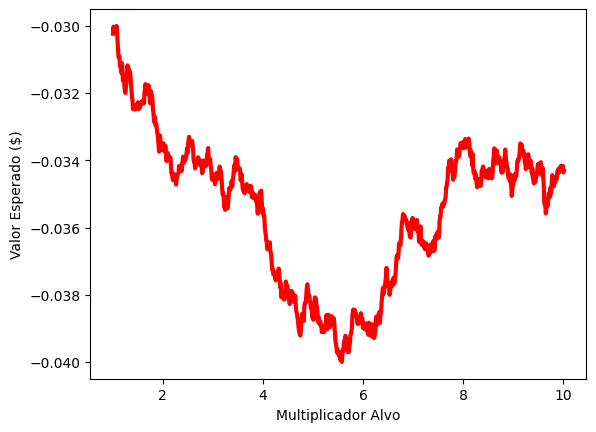

In [88]:
#p erro = (resultados < multiplicador).mean()
#p acerto = (resultados >= multiplicador).mean()
esperanca,alvo = [],[]

alvo = np.linspace(101, 1001, 901) / 100
esperanca = [(resultados < x).mean() * -1 + (x - 1)*(resultados >= x).mean() for x in alvo]

plt.plot(alvo, esperanca, linewidth=3, color='red')

plt.xlabel('Multiplicador Alvo')
plt.ylabel('Valor Esperado ($)')
#plt.title(f'Cenário hipotetico apostando no alvo de  {alvo}x, e usando {valor_aposta} como primeira aposta - {estrategia}')

plt.show()